# Handling Files and Introduction to Librosa

Librosa is populay Python library for audio processing, and quite popular for extracting features audio features.

### Let's set up the environment for this example (importing packages and configuring options)

In [9]:
#import numpy
import numpy as np

#import librosa and display the library verion installed in yoru system
import librosa, librosa.display
print(librosa.__version__)

#import matplotlib 
import matplotlib.pyplot as plt

# Render plots interactively in the notebook (not a must)
#alternatively use matplotlib inline or matplotlib notebook or matplotlib nbagg
%matplotlib nbagg

#select a different color-scheme for the plots
import matplotlib.style as ms
ms.use('seaborn-muted')

#importing audio widget from IPython.display for audio playback
from IPython.display import Audio

0.6.2


### Load an audio file, display the duration, plot the waveform, and listen to it

Librosa can open various tyoe of audio files. This include the most popular compressed and uncompressed formats.
When working audio files sourced from the internet, you may end up having various sampling rate and number of channel (this can cause errors or inconsisten features).
Librosa [load function](https://librosa.github.io/librosa/generated/librosa.core.load.html#librosa.core.load) can automatically resample audio to a give sampling rate and merge the arbitrary number of channels to mono.

Unless you are doing spatial-audio stuff, working with mono files samples at 22050 Hz is fine (the playback wont be high-fidelity, but this is not the goal here). Psychoacoustically-speaking, we can barely hear above 14 kHz. Using a lower samplign rate will save lot of memory and computation. Moreover, components at high frrequency may be just noisy for the ML task (this is not an absolute truth!)

1.0394104308390022
1.039


<IPython.core.display.Javascript object>


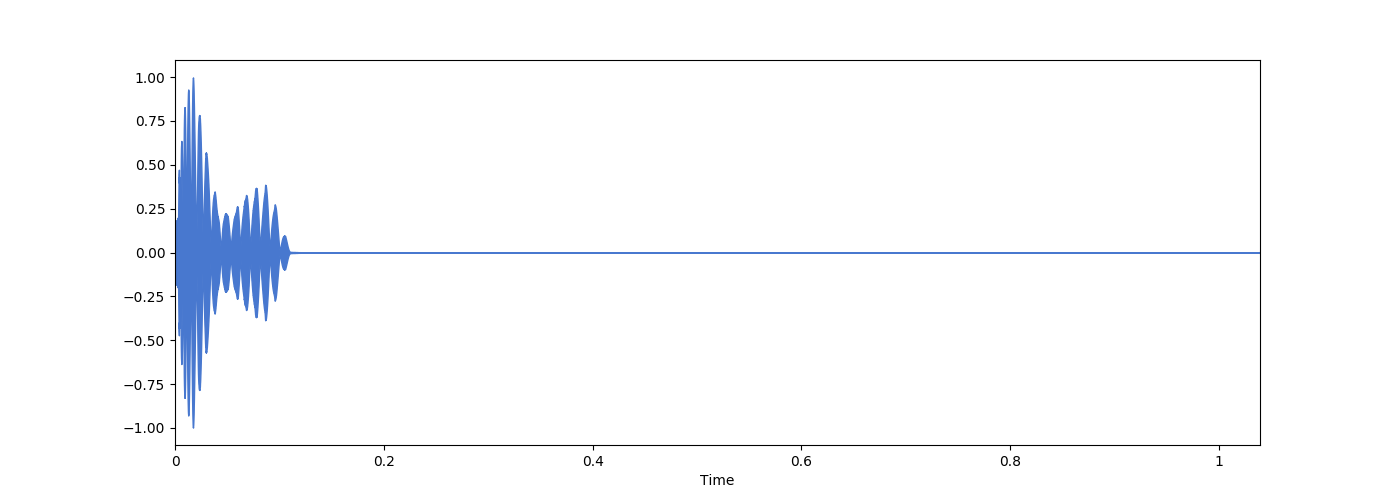

In [8]:
#chosing the sampling rate
sr = 22050

#filename including path
file = './Data/drum_samples/kick_00.wav'

#the load function returns the signal and the sampling rate
#we have to read sr back, we can't skip it or you can use read it to a dummy variable
signal, sr = librosa.load(file, sr, mono=True)

#display the duration in seconds (this is really just number_of_samples/sampling_rate)
print(librosa.samples_to_time(len(signal), sr))

#display file duration in seconds in a more readable format wit less decimals (or multiply it by 1000 and get ms)
print('{:2.3f}'.format(librosa.samples_to_time(len(signal), sr)))

#setting the size of the figure (not a must)
plt.figure(figsize=(14, 5))
#display the waveform (mind that we are not using matplotlib here!)
librosa.display.waveplot(signal, sr=sr)

#this wont play the audio but it will create a widget from which you can play
#make sure the sampling rate is correct (what happens if you change it?)
#place this at the end of the code cell, otherwise subsequent plots may override it
Audio(signal, rate=sr)

### Computing scalar features
The code below computes and display [spectral centroid](https://librosa.github.io/librosa/generated/librosa.feature.spectral_centroid.html) and [spectral flatness](https://librosa.github.io/librosa/generated/librosa.feature.spectral_flatness.html) using librosa.

This time we load a longer sound file.

Try to print the variables *cent* and *flat*, you will notice that these are arrays.

Indeed the centroid and bandwidth are computed (by default) over windows of 2048 samples with an overlap of 512 samples. Can you convert that to seconds (or milliseconds). Mind that the sampling rate is 22050 Hz.

This is called block processing (based on the short-time fourier transform) and is illustrated in the image below. Signals are usually analyzed over sequence of small overlapping windows (especially if you are converting the data to frequency domain). This process is illustrated in the image below.

![block processing](https://uk.mathworks.com/help/dsp/ref/stft_output.png)

<IPython.core.display.Javascript object>


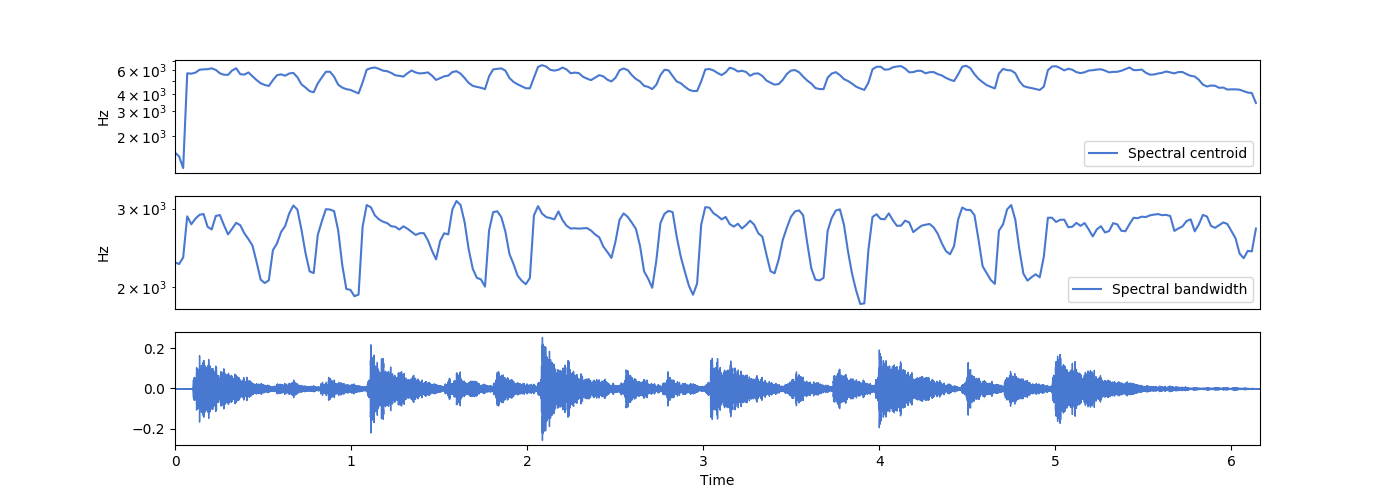

In [10]:
#chosing the sampling rate
sr = 22050

#filename including path
file = './Data/drum_samples/cymbal06.wav'

#the load function returns the signal and the sampling rate
#we have to read sr back, we can't skip it or you can use read it to a dummy variable
signal, sr = librosa.load(file, sr, mono=True)



#computing spectral centroid and bandwidth
cent = librosa.feature.spectral_centroid(signal)
flat = librosa.feature.spectral_bandwidth(signal)

#plotting centroid, bandwidth, and waveform in a 3x1 plot
plt.figure(figsize=(14, 5))
#first subplot
plt.subplot(3, 1, 1)
#using log vertical (y) axis (remember human perception of frequency....)
#and adding a label (displayed later as legend)
plt.semilogy(cent.T, label='Spectral centroid')
#vertical axis lavel
plt.ylabel('Hz')
#getting rid of ticks on horizontal axis (it wont be related to either time or samples but blocks)
plt.xticks([])
#this will help to stretch the plot to the frame
plt.xlim([0, cent.shape[-1]])
#display the legend
plt.legend()
plt.subplot(3, 1, 2)
plt.semilogy(flat.T, label='Spectral bandwidth')
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, flat.shape[-1]])
plt.legend()
plt.subplot(3, 1, 3)
#displaying the waveform as well, so we can try to identify eventual correlations 
librosa.display.waveplot(signal, sr=sr)
plt.show()

#this wont play the audio but it will create a widget from which you can play
#make sure the sampling rate is correct (what happens if you change it?)
Audio(signal, rate=sr)



### Computing vectorial features
The code below the [melspectrogram](https://librosa.github.io/librosa/generated/librosa.feature.melspectrogram.html#librosa.feature.melspectrogram) using librosa.

We use the file we loaded earlier (it's still in the *signal* array).

The mel-spectrogram is a [spectrogram](https://cnx.org/contents/d442r0wh@9.71:4XRHF7jF@22/Spectrograms) (also called sonogram) where the frequency axis is not linear (i.e. frequency points equally distributed between 0Hz and half of the sampling rate), but arranged according to the [mel scale](https://en.wikipedia.org/wiki/Mel_scale), which is more perceptually relevant.

As in the earlier example, the analysis is performed for each block (or window), but instead of computing a single number per window, we compute an array (or vector) of numbers for each window (i.e. we compute the spectrum of each window).

![spectrogram computation](https://cnx.org/resources/febd04586ef83a3d2cd2faf35c5cb27444cf70c4/sig20.png)


<IPython.core.display.Javascript object>


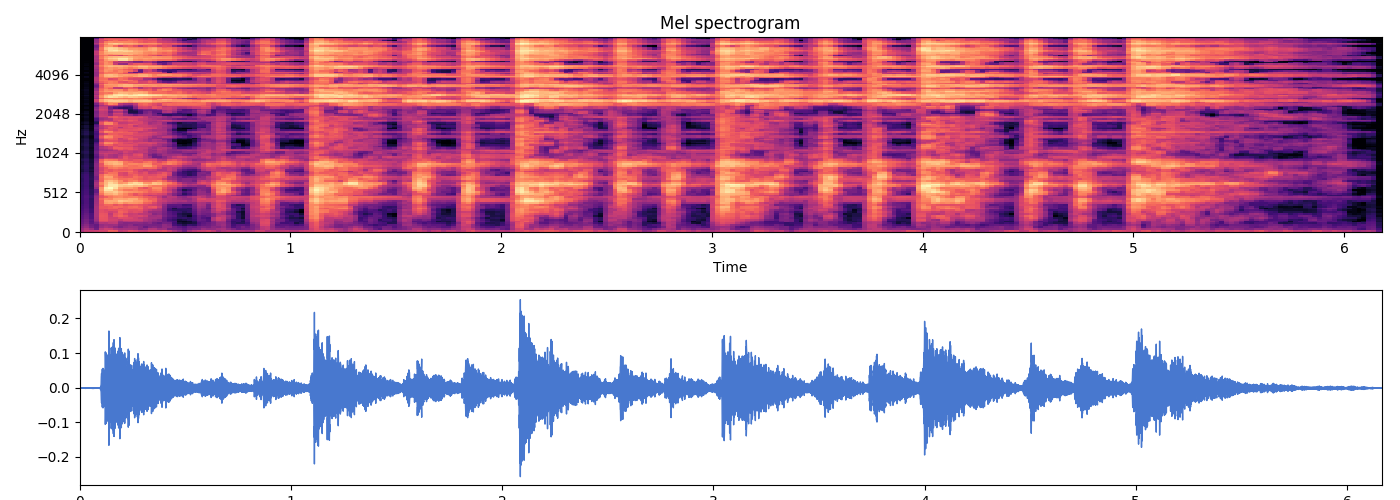

In [11]:
#computing melspectrogram
melspect = librosa.feature.melspectrogram(y=signal)

#plotting me-spectrogram and waveform 2x1 plot 
plt.figure(figsize=(14, 5))
#first subplot
plt.subplot(2, 1, 1)
#plotting mel-spectrogram and display
librosa.display.specshow(librosa.power_to_db(melspect,ref=np.max), y_axis='mel', fmax=8000, x_axis='time')
#adding a colorbar as legend
#plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

#second subplot
plt.subplot(2, 1, 2)
#displaying the waveform as well, so we can try to identify eventual correlations 
librosa.display.waveplot(signal, sr=sr)
plt.show()

<IPython.core.display.Javascript object>


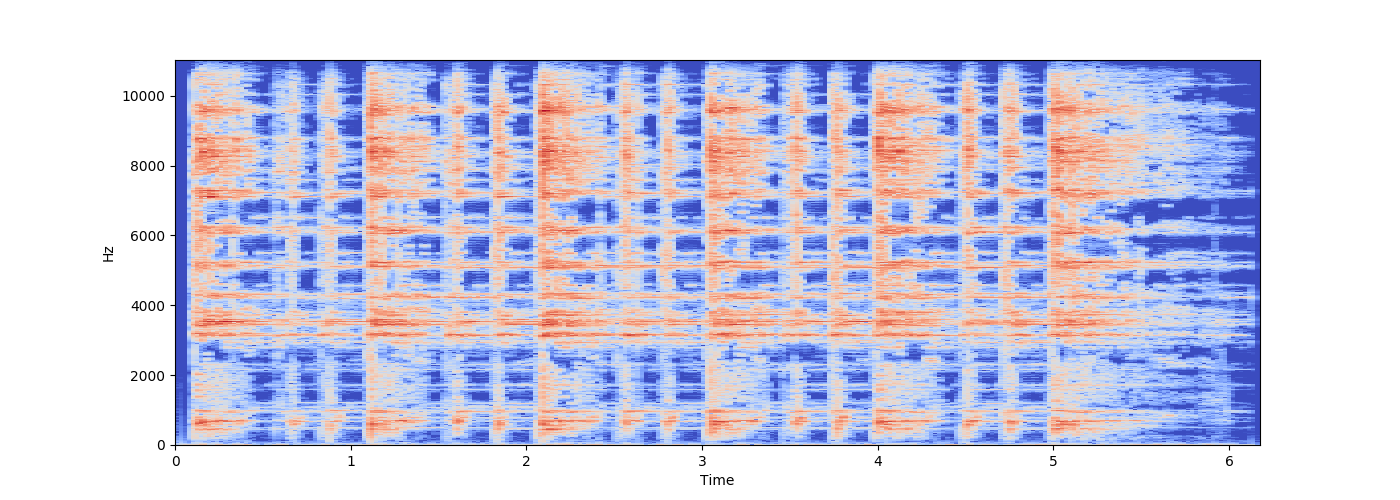

In [13]:
X = librosa.stft(signal)
#Spectrogram from amplitude
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')

# Dataset Creation for Machine Learning

### Creating a dataset including features from raw data.

When working with ML we usually handle large amount of files. Handling them individually is not an option. Learning how to handle them via programming (using dedicated packages) is the most efficient way.
In the ./Data/drum_sample foler there are 84 .wav files. 42 contains an acoustic or synthetic kick drum (0 to 41), the remaining 42 contains an acoustic or synthetic snare drum (0 to 41).

We will use this dataset for today's examples on dimensionality reduction and classification via ML (i.e. recognizing whether a sound is a snare or a kick). Mind that this dataset has an equal number of sample in each class (and you should always aim for this, minor variations are fine, e.g. 5-10%).

The raw data is organized in a way that the label (i.e. snare or drum) can be derived from the filename. This is a very handy way of handling data in supervised learning.

The code below loads all samples and computes a set of scalar features (using librosa) for all files, and store these into a handy Pandas data structure.

You can use a similar approach with any kind of data your are loading from files.

The code below uses several functions from packages that may be new to you. Please refer to the official documentaton for further details.

In [17]:
from pathlib import Path

#The next line of code includes an inline for loop 
#which will load all .mp3 samples starting with kick into kick_signals.
#The * star is also called wildcard, the librosa.load will be performed on all files which name starts
#with kick and ends with .wav (e.g. kick_03.wav, but also kick_adsugds.wav which we do not have in the folder).
#Mind that the sampling rate is the default one (do you remember the value?).
#The code below will actually create a LIST (squared brackets in Python) of Numpy arrays.
#Te have to take this approach because we are not sure that if files have the same number of samples (they do not)
#othrwise we could use a matrix (aka N dimensional Numpy array).
kick_signals = [ librosa.load(p, mono=True)[0] for p in Path().glob('Data/drum_samples/kick*.wav') ]


#Repeating the same for snare samples
snare_signals = [ librosa.load(p, mono=True)[0] for p in Path().glob('Data/drum_samples/snare*.wav') ]

#Printing the size (lenght, using len() ) of the lists which includes kick and snares (separately).
#Does the number make sense versus what you have in the drum_samples folder?
print(len(kick_signals))
print(len(snare_signals))

42
42


In [20]:
import sklearn 
import pandas as pd

#Instead of writing the code to extract the features we define a function,
#which is more elegant, it's reusable (shorter code) and makes the following code more readable.
#All features (5 of them) are from librosa and are all scalar (we take the mean over multiple blocks).
#We have to do this (use average) because we did not check if all files have the same lenght (actually they are different).
#Different file lenght generates Numpy arrays of different lenght (not comparable)
#The function returns a list containing the mean of the features on "signal", which is the parameter we pass to the function
#Mind that these features may not be the best to perform the classification task (it's just an example!)
def extract_features(signal):

    return [
        np.mean(librosa.feature.zero_crossing_rate(signal)),
        np.mean(librosa.feature.spectral_centroid(signal)),
        np.mean(librosa.feature.spectral_contrast(signal)),
        np.mean(librosa.feature.rmse(signal)),
        np.mean(librosa.feature.spectral_flatness(signal)),
    ]


#Extracting our the 5 scalar features for all kick samples.
#Ee are using another inline for loop (this is very convenient when working with lists).
#Now we can store the data on an Numpy array because the size of the data is consistent,
#indeed we will have 5 numbers (features) per sample
#to be precise, we are still storing data into a list [], and then we use the function np.array
#to convert the list into an array (we need Numpy arrays for our ML algorithm, not lists)
kick_features = np.array([extract_features(x) for x in kick_signals])

#Repearing the same for the snare samples.
snare_features = np.array([extract_features(x) for x in snare_signals])

#Displaying the size of the Numpy arrays (this time we use the .shape attribute)
#Check if the printed numbers are the expected ones (what's on the rows and what's on the columns?)
print('Size of Numpy arrays for kick and snare features')
print(kick_features.shape, snare_features.shape)

#Now we create an array of labels, we can use zeros for the kicks and ones for the snare (or any other number).
#This will help us to discriminate set of featires associated with kicks and snares
#We can opt for "text" labels but this is not convenient,
#It wont work well with neural networks, and we put "text" labels in Numpy arrays

#Create a row of zeroes as long as the number of kick samples
kicklabels = np.zeros(kick_features.shape[0])

#Create a row of ones as long as the number of snare samples
snarelabels = np.ones(snare_features.shape[0])

#Now we concatenate (attach) the numeric labels into a single array,
#and we also concatenate the two set of features
labels = np.concatenate((kicklabels,snarelabels))
features = np.concatenate((kick_features,snare_features))

#check the output and reconsile these with what we just did
print('Size of labels array',labels.shape)
print('Size of feature array',features.shape)

#Here we use the scale function of scikit-learn to scale the features,
#this is important when using hetherogeneous (different) scalar features.
#After this step all features will present zero mean and unit veriance (i.e. they are more comparable).
#It is way less recommended to do this with vectorial features.
#In this case we are overwiting the previous Numpy variable (or array) instead of creating a new one
#(it is fine if you do not need the old data anymore, and it reduces the number of variables you use in a program)
features = sklearn.preprocessing.scale(features)




#Moving the data into a Pandas structure and we assign name to each column (features are on column)
dataset = pd.DataFrame(features)
dataset.columns = ['ZC','SpecCen','SpecCon','RMS','SpecFlat']

#Sticking an extra colum as labels
dataset['Label'] = labels

#this will display the Pandas data structure
dataset


Size of Numpy arrays for kick and snare features
(42, 5) (42, 5)
Size of labels array (84,)
Size of feature array (84, 5)


ZC   SpecCen   SpecCon       RMS  SpecFlat  Label
0  -0.883163 -1.105849 -0.131371 -0.673614  0.969022    0.0
1  -0.771697 -0.662244 -0.625716 -0.689075  1.139487    0.0
2  -0.924104 -0.912199  0.380060 -0.803241  0.686154    0.0
3  -0.898136 -1.065562 -0.585951 -0.001712  0.826101    0.0
4  -0.979839 -1.230486  1.254674  2.752213  0.374972    0.0
5  -0.826071 -0.992743 -0.348271 -0.411926  1.527120    0.0
6  -0.891665 -0.846313  0.030214 -0.713811  0.549845    0.0
7  -0.904746 -0.840262 -0.679880 -0.782656  0.516953    0.0
8  -1.022463 -1.229509 -0.038382 -0.530305  0.921020    0.0
9  -0.909227 -0.735473 -0.612924 -0.801950  0.517859    0.0
10 -0.949876 -1.009071  0.139911 -0.584145  0.700997    0.0
11 -0.934988 -0.776550 -0.992571 -0.787516  0.908339    0.0
12 -0.914733 -0.895239 -1.303257 -0.431263  1.288380    0.0
13 -0.857809 -0.840484 -0.130167 -0.539242  1.476850    0.0
14 -0.978203 -0.991464 -0.004984 -0.664789  0.494853    0.0
15 -0.920494 -0.935717 -0.423770 -0.485751  0.558281    0.0
16 -0.872315 -1.073222 -3.588521 -0.776844  1.316115    0.0
17 -0.754434 -1.060557 -1.868178 -0.756666  0.941565    0.0
18 -0.999387 -1.168926 -2.542947 -0.591027  1.156961    0.0
19 -0.723348 -0.894565 -0.485493 -0.055492  1.848331    0.0
20 -0.949386 -0.925393 -0.955594 -0.763021  0.586537    0.0
21 -0.837213 -1.076759  1.110204 -0.734049  1.643080    0.0
22 -0.874096 -0.900071 -1.180475 -0.614011  1.698033    0.0
23 -1.023857 -1.067818  0.355142 -0.781011  0.847872    0.0
24 -0.907104 -1.046754  1.634260  0.051887  1.279482    0.0
25 -0.996034 -0.987384 -0.295028 -0.758523  0.425236    0.0
26 -0.888775 -0.628290 -1.976870 -0.474309  1.162929    0.0
27 -0.975982 -1.097754  0.053334 -0.781805  0.479976    0.0
28 -0.914081 -0.910857 -1.055238 -0.694623  0.703104    0.0
29 -0.925339 -0.949623 -1.107550 -0.580013  0.833938    0.0
..       ...       ...       ...       ...       ...    ...
54  0.446364  1.421152  0.826101  4.549250 -0.837882    1.0
55  1.163899  0.613357  0.630826  0.246710 -1.081213    1.0
56  1.761046  1.558886  0.669736  1.232715 -0.721979    1.0
57  1.112958  1.000470 -0.404950  0.467591 -0.896159    1.0
58  0.786211  1.064432  1.428590 -0.809887 -0.973274    1.0
59  1.620021  1.266775  0.600552 -0.698713 -0.774848    1.0
60  0.103939 -0.039327  0.045335 -0.419453 -1.121266    1.0
61  1.520402  1.341625  0.397069  0.773199 -0.878568    1.0
62  1.465228  1.485519  1.567972 -0.807891 -0.781935    1.0
63  1.075957  1.212655  0.590751 -0.744737 -0.882041    1.0
64  1.897792  1.471878  0.686033  1.259518 -0.885206    1.0
65 -0.031489  0.412913  0.685880  0.803958 -1.096829    1.0
66  0.228392  1.041323  0.875728 -0.843603 -1.046507    1.0
67  0.197004  0.278856  0.347148  0.168355 -1.039326    1.0
68  1.681877  1.224009  0.442036  0.261997 -0.760459    1.0
69  0.537756  0.604332  0.299720  0.848632 -1.036455    1.0
70  0.315908  0.926300  1.864444 -0.794877 -1.049793    1.0
71  0.623208  0.571453  0.390627  1.037559 -1.068100    1.0
72  0.136859  0.333090  0.492148  0.091494 -1.091116    1.0
73  1.747337  1.413719  1.173326 -0.739799 -0.729994    1.0
74  1.201495  1.408292  0.402772 -0.750903 -0.797997    1.0
75  0.262540  0.405544  0.119113  0.985769 -1.055605    1.0
76  0.699978  0.777941  0.601621  0.749180 -0.993906    1.0
77  0.480864  1.065548  1.115830 -0.813078 -1.025089    1.0
78  0.117350  0.501363  0.920814  0.924363 -1.137242    1.0
79 -0.238738  0.529072  0.566474  0.241794 -1.120073    1.0
80  0.811172  0.691292 -0.142829  1.468889 -1.008742    1.0
81  1.874944  0.924403 -0.199636  0.595644 -0.810712    1.0
82  0.773819  1.003740  0.823130  0.179275 -1.003424    1.0
83  1.360021  0.916002  0.364302  1.539429 -1.004744    1.0

[84 rows x 6 columns]

In [22]:
#Before proceeding with training and testing of the classifiers
#we split the data in training and testing set using a 70/30 partitioning.
#This is done a useful function in scikit-learn (called train_test_split)
#The partitioning is done randomly but starting from a seed you can specify (random_state)
#Every time you change the starting random state value, you will experience
#a different partitioning and (likely) a different classification result.

#Importing the tool,
#alternatively you can call sklearn.model_selection.train_test_split(..,..,..,)
#but that will be too long
from sklearn.model_selection import train_test_split

#splitting the dataset in training and testing parts
feat_train, feat_test, lab_train, lab_test = train_test_split(features, labels, test_size=0.3, random_state=14)

In [23]:
#Creating an instance of a KNN classifier
#and setting it to classify according to only 1 nearest neighbor
model_KNN = sklearn.neighbors.KNeighborsClassifier(n_neighbors=1)

#training the model
model_KNN.fit(feat_train, lab_train)

#applying the the model on the test data (features)
lab_predict =  model_KNN.predict(feat_test)


#print the number of misclassified samples, accuracy and complete report (using scikit learn metric tools) 
print('Number of mislabeled samples %d out of %d' % ((lab_test != lab_predict).sum(),lab_test.size))
print('Accuracy:',sklearn.metrics.accuracy_score(lab_test, lab_predict))
print(sklearn.metrics.classification_report(lab_test, lab_predict))

Number of mislabeled samples 0 out of 26
Accuracy: 1.0
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00        11
        1.0       1.00      1.00      1.00        15

avg / total       1.00      1.00      1.00        26



# Vanilla Neural Net

In these exercises, we will write a vanilla neural network to distinguish between kick and snare drum samples that we have in the data folder. First, we will write these for 

#### Exercise 1
For this exercise, we will be training a multi layer perceptron to classify snare and kick drum samples from the Data/drum_samples files.

Multi-layer Perceptron (MLP) is a supervised learning algorithm that learns a function by training on a dataset, where is the number of dimensions for input and is the number of dimensions for output. Given a set of features and a target, it can learn a non-linear function approximator for either classification or regression. It is different from logistic regression, in that between the input and the output layer, there can be one or more non-linear layers, called hidden layers. Figure 1 shows a one hidden layer MLP with scalar output.
../_images/multilayerperceptron_network.png

Figure 1 : One hidden layer MLP.

The leftmost layer, known as the input layer, consists of a set of neurons
representing the input features. Each neuron in the hidden layer transforms the values from the previous layer with a weighted linear summation , followed by a non-linear activation function

- like the hyperbolic tan function. The output layer receives the values from the last hidden layer and transforms them into output values.

The module contains the public attributes coefs_ and intercepts_. coefs_ is a list of weight matrices, where weight matrix at index
represents the weights between layer and layer . intercepts_ is a list of bias vectors, where the vector at index represents the bias values added to layer

<img src="https://scikit-learn.org/stable/_images/multilayerperceptron_network.png">

The advantages of Multi-layer Perceptron are:

        Capability to learn non-linear models.
        Capability to learn models in real-time (on-line learning) using partial_fit.

The disadvantages of Multi-layer Perceptron (MLP) include:

        MLP with hidden layers have a non-convex loss function where there exists more than one local minimum. Therefore different random weight initializations can lead to different validation accuracy.
        MLP requires tuning a number of hyperparameters such as the number of hidden neurons, layers, and iterations.
        MLP is sensitive to feature scaling.



In [24]:
from sklearn.linear_model import Perceptron

## Creating the dataset
First, we need to have a dataset that we can train our model on.

In [25]:
#The next line of code includes an inline for loop 
#which will load all .mp3 samples starting with kick into kick_signals.
#The * star is also called wildcard, the librosa.load will be performed on all files which name starts
#with kick and ends with .wav (e.g. kick_03.wav, but also kick_adsugds.wav which we do not have in the folder).
#Mind that the sampling rate is the default one (do you remember the value?).
#The code below will actually create a LIST (squared brackets in Python) of Numpy arrays.
#Te have to take this approach because we are not sure that if files have the same number of samples (they do not)
#othrwise we could use a matrix (aka N dimensional Numpy array).
kick_signals = [ librosa.load(p, mono=True)[0] for p in Path().glob('Data/drum_samples/kick*.wav') ]


#Repeating the same for snare samples
snare_signals = [ librosa.load(p, mono=True)[0] for p in Path().glob('Data/drum_samples/snare*.wav') ]

#Repeating the same for 
cymbal_signals = [ librosa.load(p, mono=True)[0] for p in Path().glob('Data/drum_samples/cymbal*.wav')]

#Printing the size (lenght, using len() ) of the lists which includes kick and snares (separately).
#Does the number make sense versus what you have in the drum_samples folder?
print(len(kick_signals))
print(len(snare_signals))
print(len(cymbal_signals))

#Reduce the sizes of all signals to the max size of cymbal files>
kick_signals = kick_signals[0:18]
snare_signals = snare_signals[0:18]
print(len(kick_signals),len(snare_signals))

42
42
18
18 18


In [26]:
#Instead of writing the code to extract the features we define a function,
#which is more elegant, it's reusable (shorter code) and makes the following code more readable.
#All features (5 of them) are from librosa and are all scalar (we take the mean over multiple blocks).
#We have to do this (use average) because we did not check if all files have the same lenght (actually they are different).
#Different file lenght generates Numpy arrays of different lenght (not comparable)
#The function returns a list containing the mean of the features on "signal", which is the parameter we pass to the function
#Mind that these features may not be the best to perform the classification task (it's just an example!)
def extract_features(signal):

    return [
        np.mean(librosa.feature.zero_crossing_rate(signal)),
        np.mean(librosa.feature.spectral_centroid(signal)),
        np.mean(librosa.feature.spectral_contrast(signal)),
        np.mean(librosa.feature.rmse(signal)),
        np.mean(librosa.feature.spectral_flatness(signal)),
    ]


#Extracting our the 5 scalar features for all kick samples.
#Ee are using another inline for loop (this is very convenient when working with lists).
#Now we can store the data on an Numpy array because the size of the data is consistent,
#indeed we will have 5 numbers (features) per sample
#to be precise, we are still storing data into a list [], and then we use the function np.array
#to convert the list into an array (we need Numpy arrays for our ML algorithm, not lists)
kick_features = np.array([extract_features(x) for x in kick_signals])

#Repearing the same for the snare samples.
snare_features = np.array([extract_features(x) for x in snare_signals])

#repeating the same for cymbal samples
cymbal_features = np.array([extract_features(x) for x in cymbal_signals])

#Displaying the size of the Numpy arrays (this time we use the .shape attribute)
#Check if the printed numbers are the expected ones (what's on the rows and what's on the columns?)
print('Size of Numpy arrays for kick and snare features:')
print(kick_features.shape, snare_features.shape, cymbal_features.shape)

#Now we create an array of labels, we can use zeros for the kicks and ones for the snare (or any other number).
#This will help us to discriminate set of featires associated with kicks and snares
#We can opt for "text" labels but this is not convenient,
#It wont work well with neural networks, and we put "text" labels in Numpy arrays

#Create a row of zeroes as long as the number of kick samples
kicklabels = np.zeros(kick_features.shape[0])

#Create a row of ones as long as the number of snare samples
snarelabels = np.ones(snare_features.shape[0])

#Create a row of twos as long as the number of cymbal samples
cymballabels = np.full(len(cymbal_features),2)

#Now we concatenate (attach) the numeric labels into a single array,
#and we also concatenate the two set of features
labels = np.concatenate((kicklabels,snarelabels,cymballabels))
features = np.concatenate((kick_features,snare_features,cymbal_features))

#check the output and reconsile these with what we just did
print('Size of labels array',labels.shape)
print('Size of feature array',features.shape)

#Here we use the scale function of scikit-learn to scale the features,
#this is important when using hetherogeneous (different) scalar features.
#After this step all features will present zero mean and unit veriance (i.e. they are more comparable).
#It is way less recommended to do this with vectorial features.
#In this case we are overwiting the previous Numpy variable (or array) instead of creating a new one
#(it is fine if you do not need the old data anymore, and it reduces the number of variables you use in a program)
features = sklearn.preprocessing.scale(features)


#Moving the data into a Pandas structure and we assign name to each column (features are on column)
dataset = pd.DataFrame(features)
dataset.columns = ['ZC','SpecCen','SpecCon','RMS','SpecFlat']

#Sticking an extra colum as labels
dataset['Label'] = labels

#this will display the Pandas data structure
dataset

classes = ['kick','snare','cymbal']

Size of Numpy arrays for kick and snare features:
(18, 5) (18, 5) (18, 5)
Size of labels array (54,)
Size of feature array (54, 5)


# Preparing the data for the network

## First we train on only ONE feature in our dataset

In [28]:
# Assign data from first five columns of features to X variable
X = dataset.iloc[:, 0:1]

# Assign data from first fifth columns to y variable
y = dataset.iloc[:,5]


In [29]:
#Import the test train splitting from the model selection component from sklearn
from sklearn.model_selection import train_test_split

#use the train_test_split function to import the results to the following variables as the names suggest:
#X_train and y_train will contain training data and labels, while
#X_test and y_test will contain testing data and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [30]:
#Import the classifier for the network
from sklearn.neural_network import MLPClassifier

#Call the classifier and specify the size of layers
mlp = MLPClassifier(hidden_layer_sizes=(2, 2), max_iter=500)

#Fit the mlp model to the training set
mlp.fit(X_train, y_train.values.ravel())

#Store the predictions of the network in a variable called predictions
predictions = mlp.predict(X_test)

/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [31]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

#Store the confusion matrix in the variable confMat
confMat = confusion_matrix(y_test,predictions)

[[4 0 0]
 [0 3 1]
 [0 1 2]]
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00         4
        1.0       0.75      0.75      0.75         4
        2.0       0.67      0.67      0.67         3

avg / total       0.82      0.82      0.82        11



<IPython.core.display.Javascript object>


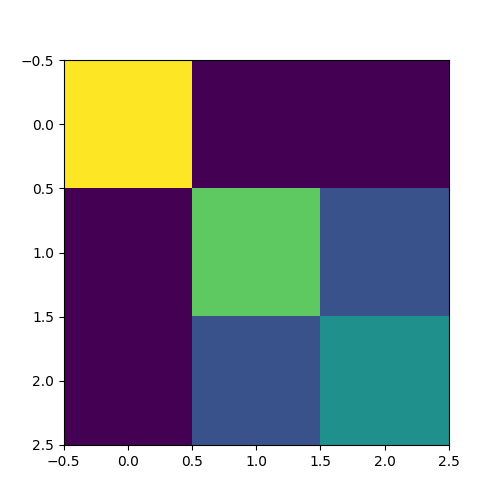

In [32]:
#Visualize the confusion matrix. Each block represents misclassified and correctly classified samples
fig, ax = plt.subplots(figsize=(5,5))
im = ax.imshow(confMat)